#**TP1: Métodos Numericos - Calculo de PageRanks**

## **Generar archivos de casos de test y .outs** 

Importo librerias

In [1]:
import numpy as np
import numpy.linalg as lng
from scipy.linalg import lu
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")

Funciones para leer/generar archivos de test y para calcular los rankings

In [2]:
def leer_grafo(path):
    file = open(path,'r')
    n = int(file.readline())
    m = int(file.readline())
    M = np.zeros((n, n))
    i = 0
    with open(path,'r') as file:
    # reading each line    
        for line in file:
            if(i>1):
                a = int(line.split()[0])
                b = int(line.split()[1])
                M[a-1][b-1] = 1
            i+=1
    return M

In [3]:
def grados(A):
    res = np.zeros(np.shape(A)[0])
    for i in range(0, np.shape(A)[0]):
        if(np.sum(A,axis = 0)[i] != 0):
            res[i] = 1/(np.sum(A,axis = 0)[i])
    return res

In [4]:
def calcl_zt(A, p):
    res = np.zeros(np.shape(A)[0])
    for i in range(0, np.shape(A)[0]):
        if(np.sum(A[i]) != 0):
            res[i] = (1-p)/np.shape(A)[0]
        else:
            res[i] = 1/np.shape(A)[0]
    return res

In [5]:
#Calcular ranks 
def calcular_ranks(test, p):
    G = leer_grafo( test)
    n = np.shape(G)[0]
    cjs = grados(G)
    D = np.array(np.diag(cjs))
    I = np.array(np.eye((n)))
    R = G @ D
    pR = p*R
    A = I - pR
    col = np.array(np.ones(n))
    x = linalg.solve(A, col)
    normalized_x = (x)/np.sum(x)
    
    return normalized_x

In [6]:
def calcular_ranks_de_matriz(G, p):
    n = np.shape(G)[0]
    cjs = grados(G)
    D = np.array(np.diag(cjs))
    I = np.array(np.eye((n)))
    R = G @ D
    pR = p*R
    A = I - pR
    col = np.array(np.ones(n))
    x = linalg.solve(A, col)
    normalized_x = (x)/np.sum(x)
    
    return normalized_x

Ejemplos para correr los test de la catedra

In [7]:
z = calcular_ranks('tests/test_aleatorio.txt', 0.85)
z

array([0.2453045 , 0.22091751, 0.22091751, 0.2453045 , 0.06755598])

In [8]:
z = calcular_ranks('tests/test_aleatorio_desordenado.txt', 0.76)

In [9]:
z = calcular_ranks('tests/test_15_segundos.txt', 0.9)

Genera .txt de nuestros tests y de los experimentos

In [10]:
def generar_archivo_test_de_matriz(test_name, A):
    #Dada una matriz te genera el .txt en el formato requerido
    file = open('test_nuestros/' + test_name, 'w')
    
    with open('test_nuestros/' + test_name, 'w') as file:
        file.write(str(np.shape(A)[0])+"\n")
        file.write(str(int(np.sum(A))) + "\n")
        for i in range(0,np.shape(A)[0]):
            for j in range(0,np.shape(A)[0]):
                if(A[i][j] == 1):
                    file.write(str(i+1) + "\t" + str(j+1) +"\n")

In [11]:
def generar_archivo_out_de_matriz(test_name, A, p):
    #Dada una matriz te genera el .txt en el formato requerido
    file = open('test_nuestros/' + test_name + ".out", 'w')
    res = calcular_ranks_de_matriz(A, p)
    with open('test_nuestros/' + test_name + ".out", 'w') as file:
        file.write(str(p)+"\n")
        for i in range(0,np.shape(res)[0]):
            file.write(str(res[i]) +"\n")

In [12]:
def generar_archivo_test_de_matriz_form_catedra(test_name, A):
    #Dada una matriz te genera el .txt en el formato requerido
    file = open('test_nuestros/' + test_name, 'w')
    
    with open('test_nuestros/' + test_name, 'w') as file:
        file.write(str(np.shape(A)[0])+"\n")
        file.write(str(int(np.sum(A))) + "\n")
        for i in range(0,np.shape(A)[0]):
            for j in range(0,np.shape(A)[0]):
                if(A[i][j] == 1):
                    file.write(str(j+1) + "\t" + str(i+1) +"\n")

# **Experimentación:**  

## **Experimentos casos extremos: Supernodo vs Antisupernodo**
Un *supernodo* es una página que es citada por todas las demás pero no cita a nadie. 

Un *antisupernodo* es una página que no es citada por nadie pero cita a todas.


Calculo de pageRanks y armado del ranking del nodo 0.

In [13]:
def armar_ranking(w, test_name, n):
  
  # Dada una matriz W y un n: calcula los pageRanks para esa matriz para todos los p
  # Luego devuelve el pageRank del nodo 0 y su posición en el ranking. Es decir, su posición luego de ordenar los 
  # nodos por su pageRank en orden decreciente. 

    p = np.arange(0.05, 1, 0.05)
    ranking = np.array(np.zeros(len(p)))
    ind_ranking = np.array(np.zeros(len(p)))
    for i in range(0, len(p)):
        z = calcular_ranks('test_nuestros/' + test_name, p[i])
        z_sort = -np.sort(-z)
        ind_ranking[i] = np.where(z_sort == z[0])[0][0] + 1 
        ranking[i] = z[0]
    return [ranking, ind_ranking, calcular_ranks('test_nuestros/' + test_name, p[11])] 

# Caso Supernodo: 
Hay un nodo que es citado por todos los demás pero no cita a nadie. Además el resto de los nodos cita a algún otro nodo de forma aleatoria

In [14]:
def armar_grafo_supernodo(n):
  #El nodo 0 es la página supernodo que es citada por todas y los demás nodos  
    supernodo = np.array(np.zeros(n*n)).reshape(n, n) ## i en w[i][j] j->i
    for j in range(1, n):
          # todos linkean al supernodo
          supernodo[0][j] = 1
    generar_archivo_test_de_matriz('test_supernodo_' + str(n) + '.txt', supernodo)
    return supernodo

In [15]:
def experimento_supernodo(n, len_p, test_name):
    # Generar el supernodo, calcula el ranking del supernodo.
    sn = armar_grafo_supernodo(n)
    res = armar_ranking(sn, test_name, n)
    return res

Corremos el experimento y generamos los gráficos

In [16]:
p = np.arange(0.05, 1, 0.05)
exp_supernodo_100x100 = experimento_supernodo(100, len(p), 'test_supernodo_' + str(100) + '.txt')


Graficamos el PageRank del supernodo

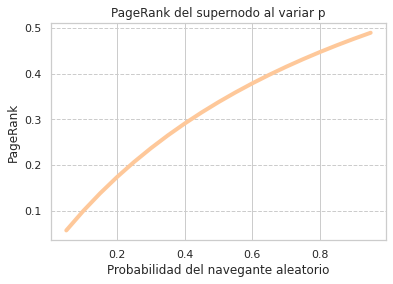

In [17]:
plt.plot(p, exp_supernodo_100x100[0], color='#fec89a', linewidth = 4)
plt.title("PageRank del supernodo al variar p")
plt.ylabel("PageRank")
plt.xlabel("Probabilidad del navegante aleatorio")
plt.grid(axis='y', linestyle = "dashed")

Graficamos la posición en el ranking del supernodo

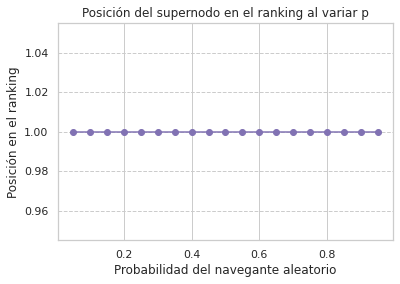

In [18]:
plt.plot(p, exp_supernodo_100x100[1], color = "m")
plt.scatter(p, exp_supernodo_100x100[1], color = "m")
plt.title("Posición del supernodo en el ranking al variar p")
plt.ylabel("Posición en el ranking")
plt.xlabel("Probabilidad del navegante aleatorio")
plt.grid(axis='y', linestyle = "dashed")

Graficamos el pagerank de todos los nodos representados en el área del punto para p=0.6

(-10.0, 105.0)

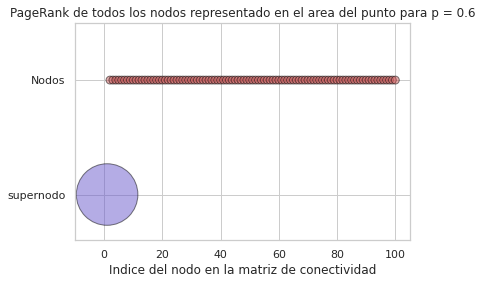

In [19]:
nodos = range(1, 101)
tipoNodo = ['Nodos' for i in range(1, 101)]
tipoNodo[0] = "supernodo"
colors = ['indianred' for i in range(0, 100)]
colors[0] = "slateblue"
rank = [10000*exp_supernodo_100x100[2][i] for i in range(0, 100)]

plt.scatter(x = nodos, y = tipoNodo, color = colors, s = rank, alpha=0.5,edgecolors='black')
#plt.scatter(nodos,  pos_x, s = 10000 * exp_supernodo_100x100[2],  c = colors, alpha=0.5)
plt.title("PageRank de todos los nodos representado en el area del punto para p = 0.6")
plt.xlabel("Indice del nodo en la matriz de conectividad")
plt.ylim(-0.4, 1.5)
plt.xlim(-10,  105)

# Caso Anti-Supernodo: 
Hay una página que cita a todas los demás pero no es citada por nadie. 

In [20]:
def armar_grafo_antisupernodo(n):
    #El nodo 0 es la página antisupernodo que cita a todas pero nadie la cita.  
    antisupernodo = np.array(np.zeros(n*n)).reshape(n, n) ## i en w[i][j] j->i
    for j in range(1, n):
      # antisupernodo linkea a todos
      antisupernodo[j][0] = 1
    generar_archivo_test_de_matriz('test_antisupernodo_' + str(n) + '.txt', antisupernodo)
    return antisupernodo

In [21]:
def experimento_antisupernodo(n, len_p, test_name):
    # Generar el anti-supernodo, calcula los ranking. 
    sn = armar_grafo_antisupernodo(n)
    res = armar_ranking(sn, test_name, n)
    return res

### Corremos el experimento

In [22]:
p = np.arange(0.05, 1, 0.05)
exp_antisupernodo_100x100 = experimento_antisupernodo(100, len(p), 'test_antisupernodo_' + str(100) + '.txt')

Grafico pagerank del antisupernodo al variar p

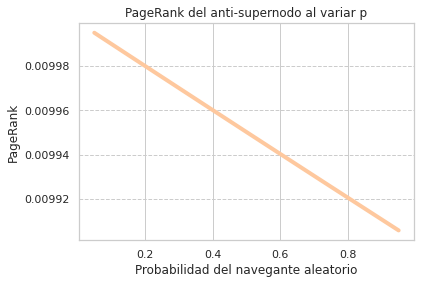

In [23]:
plt.plot(p, exp_antisupernodo_100x100[0], color='#fec89e', linewidth = 4)
plt.title("PageRank del anti-supernodo al variar p")
plt.ylabel("PageRank")
plt.xlabel("Probabilidad del navegante aleatorio")
plt.grid(axis='y', linestyle = "dashed")

Graficamos la posición en el ranking del antisupernodo al variar p 

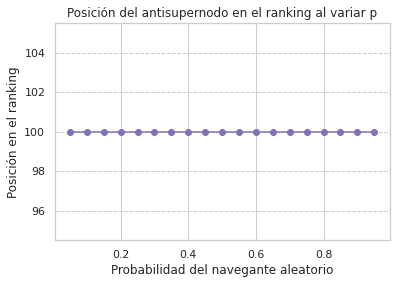

In [24]:
plt.plot(p, exp_antisupernodo_100x100[1], color = "m")
plt.scatter(p, exp_antisupernodo_100x100[1], color = "m")
plt.title("Posición del antisupernodo en el ranking al variar p")
plt.ylabel("Posición en el ranking")
plt.xlabel("Probabilidad del navegante aleatorio")
plt.grid(axis='y', linestyle = "dashed")

(-10.0, 105.0)

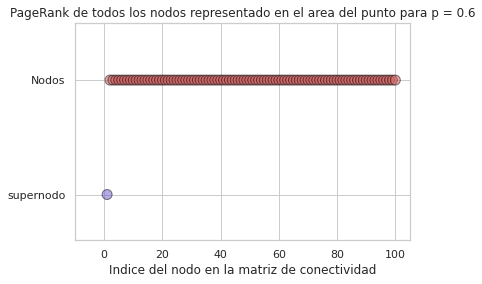

In [25]:
nodos = range(1, 101)
tipoNodo = ['Nodos' for i in range(1, 101)]
tipoNodo[0] = "supernodo"
colors = ['indianred' for i in range(0, 100)]
colors[0] = "slateblue"
rank = [10000*exp_antisupernodo_100x100[2][i] for i in range(0, 100)]
plt.scatter(x = nodos, y = tipoNodo, color = colors, s = rank, alpha=0.5,edgecolors='black')
#plt.scatter(nodos,  pos_x, s = 10000 * exp_supernodo_100x100[2],  c = colors, alpha=0.5)
plt.title("PageRank de todos los nodos representado en el area del punto para p = 0.6")
plt.xlabel("Indice del nodo en la matriz de conectividad")
plt.ylim(-0.4, 1.5)
plt.xlim(-10,  105)

# **Para un p dado le vamos agregando ejes al anti-supernodo**

In [26]:
def experimento_antisupernodo_le_agrego_ejes(n, p):
    #Generar el anti-supernodo vacio y calcula los rankings a medida de que 
    #Agrega links salientes del anti-supernodo. 
    
    W = np.array(np.zeros(n*n)).reshape(n,n)

    ranking_prom = np.array(np.zeros(n-1))
    pos_ranking_prom = np.array(np.zeros(n-1))
    
    for i in range(1, n):
        W[i][0] = 1
        res = calcular_ranks_de_matriz(W, p) 
        ranking_prom[i-1] = res[0]
        res_sort = -np.sort(-res)
        pos_ranking_prom[i-1] = np.where(res_sort == res[0])[0][0] + 1
    return [ranking_prom, pos_ranking_prom]

Corremos el experimento

In [27]:
p = np.arange(0.05, 1, 0.05)
exp_antisupernodo_le_agrego = experimento_antisupernodo_le_agrego_ejes(100, 0.6)

Graficamos el pagerank

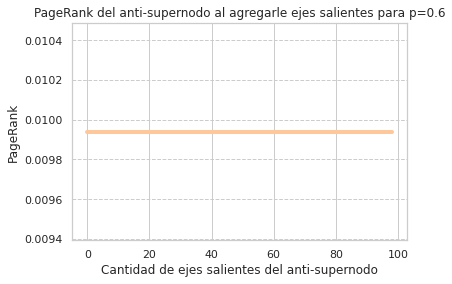

In [28]:
plt.plot(np.arange(0, 99, 1), exp_antisupernodo_le_agrego[0], color='#fec89a', linewidth = 4)
plt.title("PageRank del anti-supernodo al agregarle ejes salientes para p=0.6")
plt.ylabel("PageRank")
plt.xlabel("Cantidad de ejes salientes del anti-supernodo") 
plt.grid(axis='y', linestyle = "dashed")

Graficamos la posición en el ranking

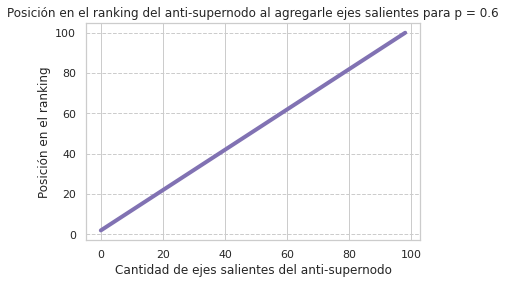

In [29]:
plt.plot(np.arange(0, 99, 1), exp_antisupernodo_le_agrego[1], color="m", linewidth = 4)
plt.title("Posición en el ranking del anti-supernodo al agregarle ejes salientes para p = 0.6")
plt.ylabel("Posición en el ranking")
plt.xlabel("Cantidad de ejes salientes del anti-supernodo") 
plt.grid(axis='y', linestyle = "dashed")

# **Experimento Página de Wikipedia**


Simulemos https://en.wikipedia.org/wiki/PageRank. Esta página linkea a muchos papers y es linkeada por muchos tutoriales y blogs sobre pageRank. Además algunos de los tutoriales tambien van a linkear a los papers. 
Vamos a ver que el ranking de la página se mantiene en los primeros lugares luego de 

Generamos una matriz con las siguientes páginas 
- Nodo 0: Una entrada de Wikipedia
- Nodo 1 a k: papers que son citados por Wikipedia
- Nodo k+1 a l: páginas de blogs/tutoriales que citan a Wikipedia y a alguno de los papers 
- El resto son páginas que citan a Wikipedia y a alguna otra página random.  

In [30]:
def simular_wikipedia(n, n_papers, n_pag_citan_papers):
  
  W = np.array(np.zeros(n*n)).reshape(n, n) ## i en w[i][j] j->i
  np.set_printoptions(edgeitems = 10)
  
  ind_papers = np.arange(1, n_papers+1, 1)
  ind_paginas_citan_papers = np.arange(n_papers +1 ,n_papers + n_pag_citan_papers+1,1) 

  for i in range(0, n): 
      for j in range(0, n):
          if(i == 0 and j!=i and not(j in ind_papers)): 
              # todos linkean a wikipedia menos los papers
              W[i][j] = 1                
          elif(j == 0 and j!=i and (i in ind_papers)): 
              # wikipedia linkea a los papers
              W[i][j] = 1

          elif(j!=i and (i in ind_papers) and (j in ind_paginas_citan_papers)): 
              #algunas paginas van a linkear a los papers
              W[i][j] = 1
  generar_archivo_test_de_matriz('test_wikipedia' + str(n) + '.txt', W)

In [31]:
def calculo_puntaje_wiki(n):
  p = np.arange(0.05, 1, 0.05)
  rank_wiki = np.array(np.zeros(len(p)))
  ind_rank_wiki = np.array(np.zeros(len(p)))
  for i in range(0, len(p)):
    z = calcular_ranks('test_nuestros/test_wikipedia' + str(n) + '.txt', p[i])
    z_sort = np.sort(z)
    ind_rank_wiki[i] = n-(np.where(z_sort == z[0])[0][0]) 
    rank_wiki[i] = z[0] 
  
  return [rank_wiki, ind_rank_wiki]


## Analizamos el PageRank y la posición del ranking de Wikipedia

In [32]:
def experimento_wiki(n, n_papers, n_pag_citan_papers):
  p = np.arange(0.05, 1, 0.05)
  simular_wikipedia(n, n_papers, n_pag_citan_papers)
  res = calculo_puntaje_wiki(n)
  return res

corremos el experimento

In [33]:
res_exp1_wiki50x50 = experimento_wiki(50, 5, 10)

graficamos el pagerank de Wikipedia

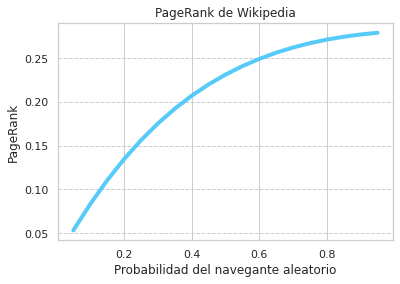

In [34]:
p = np.arange(0.05, 1, 0.05)
plt.plot(p, res_exp1_wiki50x50[0], color = "#56CBF9", linewidth = 4)
plt.title("PageRank de Wikipedia")
plt.xlabel("Probabilidad del navegante aleatorio")
plt.ylabel("PageRank")
plt.grid(axis='y', linestyle = "dashed")

Graficamos la posición en el ranking de wikipedia

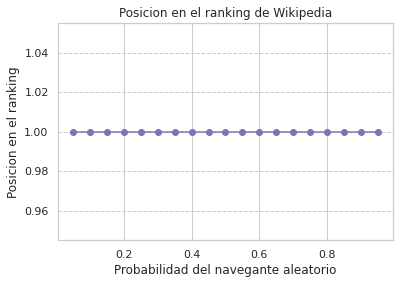

In [35]:
p = np.arange(0.05, 1, 0.05)
plt.scatter(p, res_exp1_wiki50x50[1], color='m')
plt.plot(p, res_exp1_wiki50x50[1], color='m')
plt.title("Posicion en el ranking de Wikipedia")
plt.xlabel("Probabilidad del navegante aleatorio")
plt.ylabel("Posicion en el ranking")
plt.grid(axis='y', linestyle = "dashed")

Graficamos los pagerank de todos los nodos para p=0.6

(-10.0, 105.0)

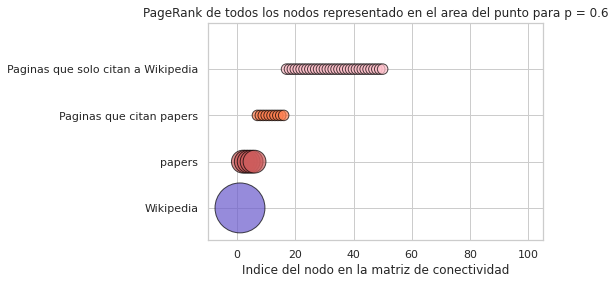

In [36]:
nodos = range(1, 51)
tipoNodo = ["Wikipedia"] + ["papers" for i in range(1, 6)] + ["Paginas que citan papers" for i in range(1,  11)] + ['Paginas que solo citan a Wikipedia' for i in range(1, 35)]
colors = ['indianred' for i in range(0, 6)] + ["coral" for i in range(0, 10)] + ["pink" for i in range(1, 35)]
colors[0] = "slateblue"
pageRanks = 10000*calcular_ranks('test_nuestros/test_wikipedia' + str(50) + '.txt', p[11])
plt.scatter(x = nodos, y = tipoNodo, color = colors, s = pageRanks, alpha=0.7, edgecolors='black')
#plt.scatter(nodos,  pos_x, s = 10000 * exp_supernodo_100x100[2],  c = colors, alpha=0.5)
plt.title("PageRank de todos los nodos representado en el area del punto para p = 0.6")
plt.xlabel("Indice del nodo en la matriz de conectividad")
plt.ylim(-0.7, 4)
plt.xlim(-10,  105)

(-10.0, 105.0)

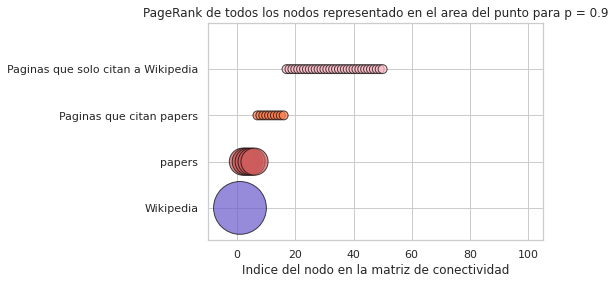

In [37]:
nodos = range(1, 51)
tipoNodo = ["Wikipedia"] + ["papers" for i in range(1, 6)] + ["Paginas que citan papers" for i in range(1,  11)] + ['Paginas que solo citan a Wikipedia' for i in range(1, 35)]
colors = ['indianred' for i in range(0, 6)] + ["coral" for i in range(0, 10)] + ["pink" for i in range(1, 35)]
colors[0] = "slateblue"
pageRanks = 10000*calcular_ranks('test_nuestros/test_wikipedia' + str(50) + '.txt', p[18])
plt.scatter(x = nodos, y = tipoNodo, color = colors, s = pageRanks, alpha=0.7, edgecolors='black')
#plt.scatter(nodos,  pos_x, s = 10000 * exp_supernodo_100x100[2],  c = colors, alpha=0.5)
plt.title("PageRank de todos los nodos representado en el area del punto para p = 0.9")
plt.xlabel("Indice del nodo en la matriz de conectividad")
plt.ylim(-0.7, 4)
plt.xlim(-10,  105)

## Analizamos el PageRank y la posición del ranking de un paper

In [38]:
def calculo_puntajes_papers(n, m):
  p = np.arange(0.05, 1, 0.05)
  rank_paper = np.array(np.zeros(len(p)))
  ind_rank_paper = np.array(np.zeros(len(p)))

  for i in range(0, len(p)):
    z = calcular_ranks('test_nuestros/test_wikipedia' + str(n) + '.txt', p[i])
    z_sort = np.sort(z)
    
    ind_rank_paper[i] = n-(np.where(z_sort == z[m])[0][0])
    rank_paper[i] = z[m] 
  return [rank_paper, ind_rank_paper]

In [39]:
def experimento_paper(n, n_papers, m, n_pag_citan_papers):
  p = np.arange(0.05, 1, 0.05)
  simular_wikipedia(n, n_papers, n_pag_citan_papers)
  res = calculo_puntajes_papers(n, m)
  return res

Corremos el experimento

In [40]:
res_exp1_paper50x50 = experimento_paper(50, 5, 2, 10)

In [41]:
p = np.arange(0.05, 1, 0.05)
p_round = np.round(p,2)

Graficamos el pagerank de un paper

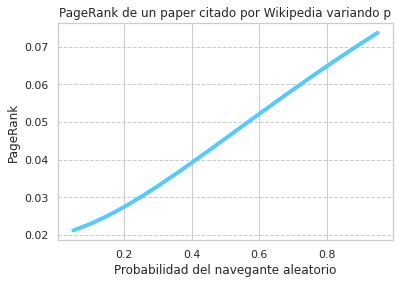

In [42]:
plt.plot(p, res_exp1_paper50x50[0], color='#56CBF9', linewidth=4)
plt.title("PageRank de un paper citado por Wikipedia variando p")
plt.xlabel("Probabilidad del navegante aleatorio")
plt.ylabel("PageRank")
plt.grid(axis='y', linestyle = "dashed")

Graficamos la posición en ranking del paper

(5.0, 7.0)

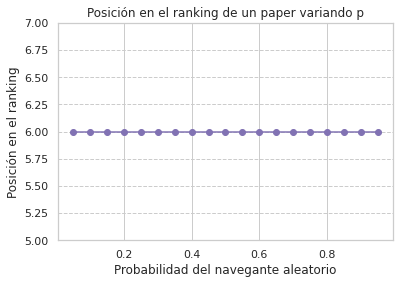

In [43]:
p = np.arange(0.05, 1, 0.05)
plt.scatter(p, res_exp1_paper50x50[1], color='m')
plt.plot(p, res_exp1_paper50x50[1], color='m')
plt.title("Posición en el ranking de un paper variando p")
plt.xlabel("Probabilidad del navegante aleatorio")
plt.ylabel("Posición en el ranking")
plt.grid(axis='y', linestyle = "dashed")
plt.ylim(5, 7)

# **Analizamos el pageRank y la posición de Wikipedia al variar la cantidad de papers y páginas que los citan**

# Variamos la cantidad de papers

In [44]:
def calculo_puntaje_wiki_p_fijo(n, p, test_name):
  z = calcular_ranks(test_name, p)
  z_sort = np.sort(z)
  ind_rank_wiki = n-(np.where(z_sort == z[0])[0][0]) 
  rank_wiki = z[0] 
  
  return [rank_wiki, ind_rank_wiki]

In [45]:
def experimento_wiki_p_fijo(n, n_papers, n_pag_citan_papers, p):
  simular_wikipedia(n, n_papers, n_pag_citan_papers)
  res = calculo_puntaje_wiki_p_fijo(n, p, 'test_nuestros/test_wikipedia' + str(n) + '.txt')
  return res

In [46]:
def variar_papers(n, range_papers, n_pag_citan_papers):
  p = 0.6
  res = [[],[]]
  for i in range_papers:
    temp = experimento_wiki_p_fijo(n,i, n_pag_citan_papers, p)
    res[0].append(temp[0])
    res[1].append(temp[1])
  return res
    

Corremos el experimento

In [47]:
range_papers = [5,10,15,20,25,30,35]
exp_variar_papers = variar_papers(50,range_papers,10)

Graficamos el pagerank de wikipedia

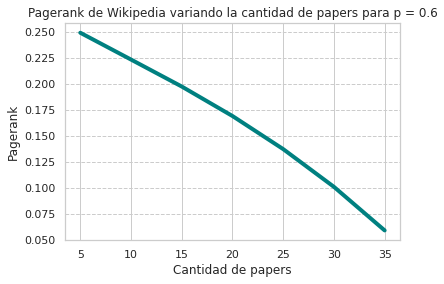

In [48]:
range_papers = [5,10,15,20,25,30,35]
plt.plot(range_papers, exp_variar_papers[0], color='teal', linewidth = 4)
plt.title("Pagerank de Wikipedia variando la cantidad de papers para p = 0.6")
plt.xlabel("Cantidad de papers")
plt.ylabel("Pagerank")
plt.grid(axis='y', linestyle = "dashed")

Graficamos la posición en el ranking de Wikipedia

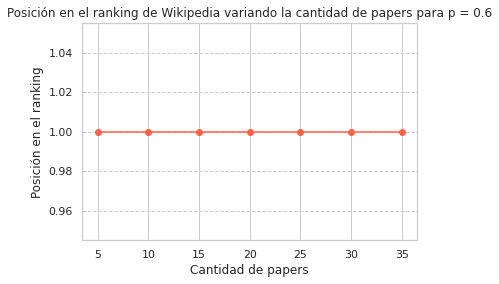

In [49]:
range_papers = [5,10,15,20,25,30,35]
plt.scatter(range_papers, exp_variar_papers[1], color='tomato')
plt.plot(range_papers, exp_variar_papers[1], color='tomato')
plt.title("Posición en el ranking de Wikipedia variando la cantidad de papers para p = 0.6")
plt.xlabel("Cantidad de papers")
plt.ylabel("Posición en el ranking")
plt.grid(axis='y', linestyle = "dashed")


# Variamos la cantidad de paginas que citan papers

In [50]:
def variar_pag_citan_papers(n, n_papers, range_pag_citan_papers):
  p = 0.6
  res = [[],[]]
  for i in range_pag_citan_papers:
    temp = experimento_wiki_p_fijo(n,n_papers, i, p)
    res[0].append(temp[0])
    res[1].append(temp[1])
  return res

Corremos el experimentos

In [51]:
range_pag_citan_papers = [5,10,15,20,25,30,35]
exp_variar_pag_citan_papers = variar_pag_citan_papers(50,5,range_pag_citan_papers)

Graficamos el pagerank de Wikipedia

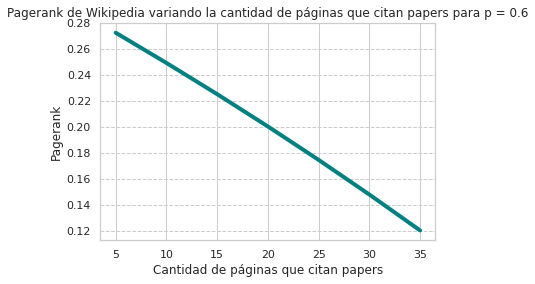

In [52]:
range_pag_citan_papers = [5,10,15,20,25,30,35]
plt.plot(range_pag_citan_papers, exp_variar_pag_citan_papers[0], color='teal', linewidth = 4)
plt.title("Pagerank de Wikipedia variando la cantidad de páginas que citan papers para p = 0.6")
plt.xlabel("Cantidad de páginas que citan papers")
plt.ylabel("Pagerank")
plt.grid(axis='y', linestyle = "dashed")

Graficamos la posición en el ranking de wikipedia

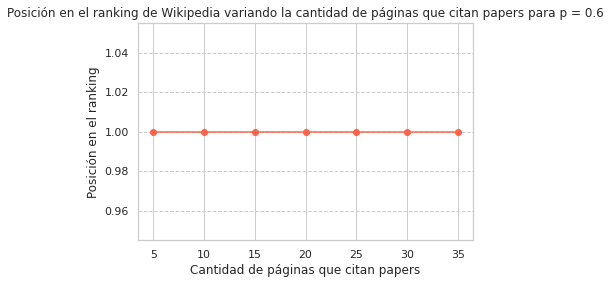

In [53]:
range_pag_citan_papers = [5,10,15,20,25,30,35]
plt.scatter(range_pag_citan_papers, exp_variar_pag_citan_papers[1], color='tomato')
plt.plot(range_pag_citan_papers, exp_variar_pag_citan_papers[1], color='tomato')
plt.title("Posición en el ranking de Wikipedia variando la cantidad de páginas que citan papers para p = 0.6")
plt.xlabel("Cantidad de páginas que citan papers")
plt.ylabel("Posición en el ranking")
plt.grid(axis='y', linestyle = "dashed")


#Analizamos el pageRank y la posición de Wikipedia al agregarle un supernodo

In [54]:
def simular_wikipedia_con_supernodo(n, n_papers, n_pag_citan_papers, m):
  #Creamos una red con una wikipedia como los experimentos anteriores pero en
  #Las filas n a m de la matriz agregamos un supernodo
  W = np.array(np.zeros((n+m)*(n+m))).reshape(n+m, n+m) ## i en w[i][j] j->i  
  ind_papers = np.arange(1, n_papers+1, 1)
  ind_paginas_citan_papers = np.arange(n_papers +1 ,n_papers + n_pag_citan_papers+1,1) 
  
  for i in range(0, n):
      for j in range(0, n):
          if(i == 0 and j!=i and not((j in ind_papers))): 
              # todos linkean a wikipedia menos los papers y los del supernodo
              W[i][j] = 1                
          elif(j == 0 and j!=i and (i in ind_papers)): 
              # wikipedia linkea a los papers
              W[i][j] = 1

          elif(j!=i and (i in ind_papers) and (j in ind_paginas_citan_papers)): 
              #algunas paginas van a linkear a los papers
              W[i][j] = 1
  for i in range(n, n+m):
    for j in range(n, n+m): 
      if (i == n and j != i):
        W[i][j] = 1 #todos los nodos de las filas de n+1 a n+m citan al supernodo
  generar_archivo_test_de_matriz('test_wikipedia_supernodo' + str(n+m) + '.txt', W)

In [55]:
def experimento_wiki_con_supernodo(n, n_papers, n_pag_citan_papers, m, p):
  # m es la cantidad de nodos que se agregan. Donde el nodo n+m será el supernodo
  # y los nodos en las filas de n+m+1 a n+m citan al supernodo
  simular_wikipedia_con_supernodo(n, n_papers, n_pag_citan_papers, m)
  #Acá hay un tema del nombre 
  res = calculo_puntaje_wiki_p_fijo(n+m, p, 'test_nuestros/test_wikipedia_supernodo' + str(n+m) + '.txt')
  return res

Corremos el experimento

In [56]:
wiki50x50_supernodo10x10 = experimento_wiki_con_supernodo(50, 5, 10, 10, 0.6)

(-10.0, 105.0)

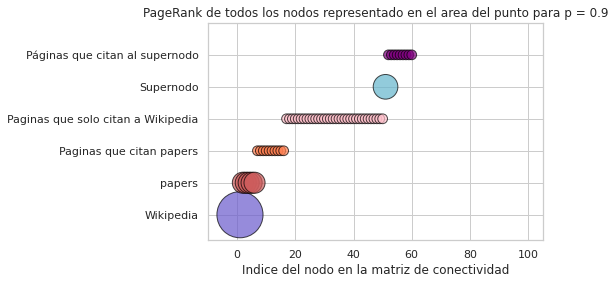

In [57]:
nodos = range(1, 61)
tipoNodo = ["Wikipedia"] + ["papers" for i in range(1, 6)] + ["Paginas que citan papers" for i in range(1,  11)] + ['Paginas que solo citan a Wikipedia' for i in range(1, 35)] + ["Supernodo"]+ ["Páginas que citan al supernodo" for i in range(0, 9)]
colors = ['indianred' for i in range(0, 6)] + ["coral" for i in range(0, 10)] + ["pink" for i in range(1, 35)] + ["c"] + ["purple" for i in range(0, 9)]
colors[0] = "slateblue"
pageRanks = 10000*calcular_ranks('test_nuestros/test_wikipedia_supernodo' + str(60) + '.txt', p[11])
plt.scatter(x = nodos, y = tipoNodo, color = colors, s = pageRanks, alpha=0.7, edgecolors='black')
#plt.scatter(nodos,  pos_x, s = 10000 * exp_supernodo_100x100[2],  c = colors, alpha=0.5)
plt.title("PageRank de todos los nodos representado en el area del punto para p = 0.9")
plt.xlabel("Indice del nodo en la matriz de conectividad")
plt.ylim(-0.8, 6)
plt.xlim(-10,  105)

In [58]:
def generar_plot_pagerank_area_nodos(n, n_papers, n_pag_citan_papers, m, p):
  wiki50x50_supernodo10x10 = experimento_wiki_con_supernodo(n, n_papers, n_pag_citan_papers, m, p)
  nodos = range(1, n+m+1)
  tipoNodo = ["Wikipedia"] + ["papers" for i in range(1, n_papers+1)] + ["Paginas que citan papers" for i in range(1,  n_pag_citan_papers)] + ['Paginas que solo citan a Wikipedia' for i in range(1,n+1-n_papers-n_pag_citan_papers)] + ["Supernodo"]+ ["Páginas que citan al supernodo" for i in range(1, m)]
  colors = ['indianred' for i in range(1, n_papers+1)] + ["coral" for i in range(1, n_pag_citan_papers+1)] + ["pink" for i in range(1, n+1-n_papers-n_pag_citan_papers)] + ["c"] + ["purple" for i in range(1, m)]
  colors[0] = "slateblue"
  pageRanks = 10000*calcular_ranks('test_nuestros/test_wikipedia_supernodo' + str(n+m) + '.txt', p)
  print(pageRanks[0], " ", pageRanks[n])
  plt.scatter(x = nodos, y = tipoNodo, color = colors, s = pageRanks, alpha=0.7, edgecolors='black')
  plt.title("PageRank de todos los nodos representado en el area del punto para p = " + str(p))
  plt.xlabel("Indice del nodo en la matriz de conectividad")
  plt.ylim(-0.8, 6)
  plt.xlim(-10,  105)

1509.027216383725   1522.5006736728644


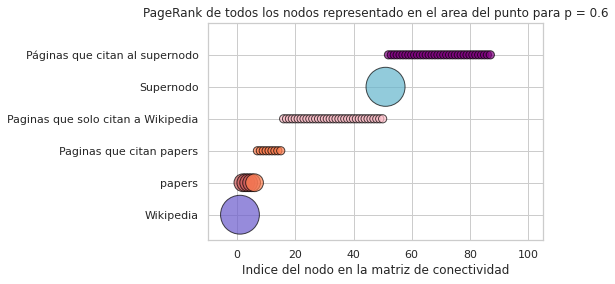

In [59]:
generar_plot_pagerank_area_nodos(50, 5, 10, 37, 0.6)

# Generación de casos de test para probar la eficiencia de la implementación de matrices ralas

Generamos el .out para wikipedia

In [60]:
simular_wikipedia(50, 5, 10)
wiki50x50 = leer_grafo('test_nuestros/test_wikipedia50.txt')
generar_archivo_out_de_matriz('test_wikipedia50.txt',wiki50x50,0.6)
generar_archivo_test_de_matriz_form_catedra('test_wikipedia_50.txt', wiki50x50) 

In [61]:
simular_wikipedia(10, 2, 3)
wiki10x10 = leer_grafo('test_nuestros/test_wikipedia10.txt')
generar_archivo_out_de_matriz('test_wikipedia10.txt',wiki10x10,0.6)

.out de supernodo y antisupernodo

In [62]:
supernodo = armar_grafo_supernodo(100)
generar_archivo_out_de_matriz('test_supernodo_100.txt',supernodo,0.6)

In [63]:
antisupernodo = armar_grafo_antisupernodo(100)
generar_archivo_out_de_matriz('test_antisupernodo_100.txt',antisupernodo,0.6)

.out de un grafo completo de 25x25

In [64]:
grafoCompleto25x25 = np.array(np.zeros(25*25)+1).reshape(25, 25)
generar_archivo_test_de_matriz_form_catedra('completo25x25.txt', grafoCompleto25x25)
generar_archivo_out_de_matriz('completo25x25.txt',grafoCompleto25x25,0.6)